In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from kneed import KneeLocator
from sklearn.decomposition import PCA
import math
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score
import zipfile
import plotly.graph_objects as go

In [43]:
quant_clusters = pd.read_csv("quant_assignments_list.csv")
qual_clusters = pd.read_csv("qual_assignments.csv")
noise_clusters = pd.read_csv("noise_assignment.csv")
player_id_mapping = pd.read_csv("player_id_mapping.csv")
player_id_mapping = player_id_mapping.drop(columns = ['Unnamed: 0'])

quant_mapped = quant_clusters.merge(player_id_mapping, how = "left", on = "player_id")
qual_mapped = qual_clusters.merge(player_id_mapping, how = "left", on = "player_id")
noise_mapped = noise_clusters.merge(player_id_mapping, how = "left", on = "player_id")

quant_labels = quant_mapped['cluster']
qual_labels = qual_mapped['cluster']
noise_labels = noise_mapped['cluster']


quant_noise_ari = adjusted_rand_score(quant_labels, noise_labels)
quant_qual_ari = adjusted_rand_score(quant_labels, qual_labels)
print(f'Noise ARI: {quant_noise_ari}')
print(f'Qual ARI: {quant_qual_ari}')

-0.000479640900012417
0.05851306728227796


In [62]:
def create_improved_sankey(quant_clusters, qual_clusters):
    df = pd.DataFrame({
        'QuantCluster': quant_clusters,
        'QualCluster': qual_clusters
    })

    transition_counts = df.groupby(['QuantCluster', 'QualCluster']).size().reset_index(name='count')

    quant_labels = sorted(df['QuantCluster'].unique())
    qual_labels = sorted(df['QualCluster'].unique())
    all_labels = [f'Q_{int(i)}' for i in quant_labels] + [f'QQ_{int(i)}' for i in qual_labels]

    label_to_index = {label: i for i, label in enumerate(all_labels)}

    sources = []
    targets = []
    values = []
    colors = []

    color_palette = [
        'rgba(31, 119, 180, 0.8)', 'rgba(255, 127, 14, 0.8)', 'rgba(44, 160, 44, 0.8)',
        'rgba(214, 39, 40, 0.8)', 'rgba(148, 103, 189, 0.8)', 'rgba(140, 86, 75, 0.8)',
        'rgba(227, 119, 194, 0.8)', 'rgba(127, 127, 127, 0.8)', 'rgba(188, 189, 34, 0.8)',
        'rgba(23, 190, 207, 0.8)'
    ]
    
    for i, row in transition_counts.iterrows():
        q_label = f'Q_{int(row['QuantCluster'])}'
        qq_label = f'QQ_{int(row['QualCluster'])}'
        sources.append(label_to_index[q_label])
        targets.append(label_to_index[qq_label])
        values.append(row['count'])
        colors.append(color_palette[i % len(color_palette)])

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=30, thickness=30, line=dict(color='black', width=0.5),
            label=all_labels, color='rgba(100, 100, 100, 0.8)'
        ),
        link=dict(
            source=sources, target=targets, value=values,
            color=colors
        )
    )])

    fig.update_layout(
        title_text='QB Cluster Transition: Quant → Quant+Qual',
        font_size=14,
        width=1200,
        height=800
    )

    fig.show()


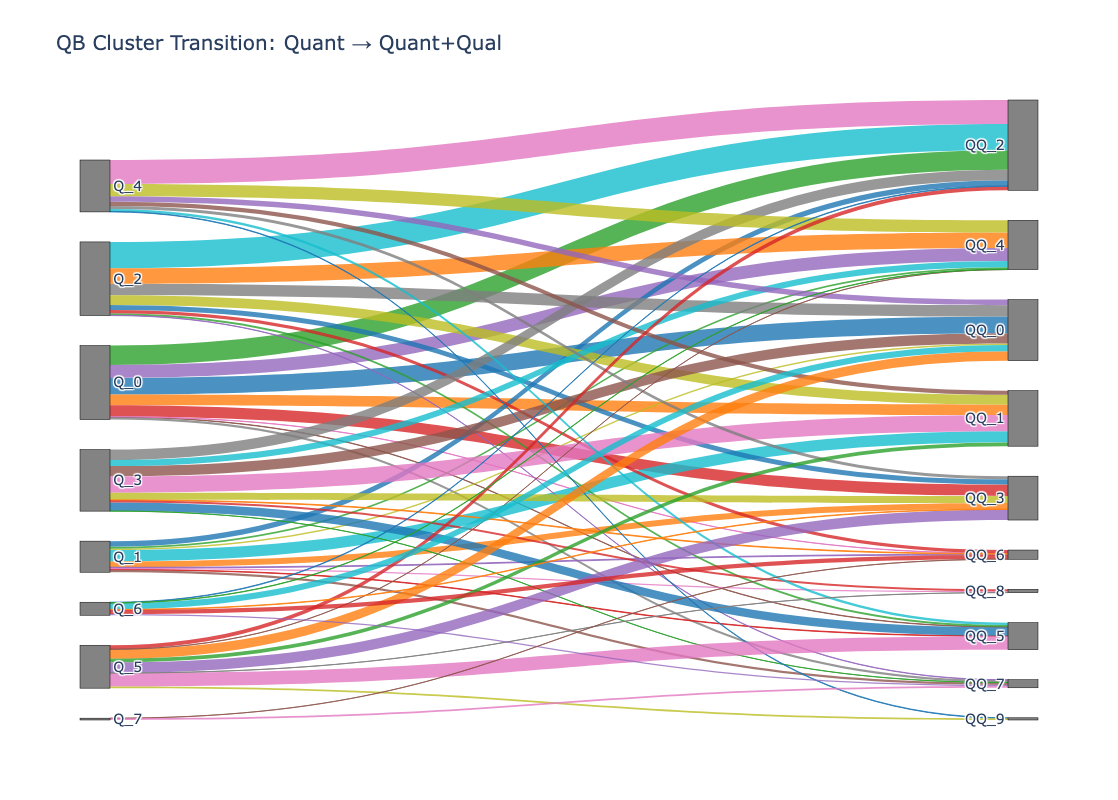

In [63]:
qb_quant_label = quant_mapped[quant_mapped['pos_abbr_x'] == 'QB']['cluster']
qb_qual_label = qual_mapped[qual_mapped['pos_abbr_x'] == 'QB']['cluster']
create_improved_sankey(quant_labels, qual_labels)